In [1]:
import pandas as pd

# Read the dataset
df = pd.read_csv('migration.csv')

# Print basic stats
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print("Missing Values:\n", df.isnull().sum())
print("Basic Statistics:\n", df.describe())

Dataset Shape: (160781, 11)
Columns: Index(['Country Origin Name', 'Country Origin Code',
       'Migration by Gender Name', 'Migration by Gender Code',
       'Country Dest Name', 'Country Dest Code', '1960 [1960]', '1970 [1970]',
       '1980 [1980]', '1990 [1990]', '2000 [2000]'],
      dtype='object')
Missing Values:
 Country Origin Name         3
Country Origin Code         5
Migration by Gender Name    5
Migration by Gender Code    5
Country Dest Name           5
Country Dest Code           5
1960 [1960]                 5
1970 [1970]                 5
1980 [1980]                 5
1990 [1990]                 5
2000 [2000]                 5
dtype: int64
Basic Statistics:
        Country Origin Name Country Origin Code Migration by Gender Name  \
count               160778              160776                   160776   
unique                 234                 232                        3   
top            Afghanistan                 AFG                    Total   
freq          

In [2]:
import plotly.express as px

In [3]:
df.shape

(160781, 11)

In [3]:
df = df[~df.isna().any(axis = 1)]
df.shape

(160776, 11)

In [4]:
pairs = set(zip(df["Country Origin Name"], df["Country Dest Name"]))

# Identify pairs that do not have a corresponding reverse pair
missing_bidirectional = []
for origin, dest in pairs:
    if (dest, origin) not in pairs:
        missing_bidirectional.append((origin, dest))

missing_bidirectional_df = pd.DataFrame(missing_bidirectional, columns=["Country Origin Name", "Country Dest Name"])


missing_bidirectional_df

,Country Origin Name,Country Dest Name
0,Refugees,Uganda
1,Refugees,Falkland Islands (Malvinas)
2,Refugees,Germany
3,Refugees,Malaysia
4,Refugees,Tajikistan
...,...,...
226,Refugees,Sao Tome and Principe
227,Refugees,Benin
228,Refugees,Ireland
229,Refugees,Anguilla


In [103]:
missing_bidirectional_df['Country Origin Name'].unique()

array(['Refugees'], dtype=object)

In [5]:
df.rename(columns=lambda x: x.split(' ')[0] if x.endswith(']') else x, inplace=True)
df.columns

Index(['Country Origin Name', 'Country Origin Code',
       'Migration by Gender Name', 'Migration by Gender Code',
       'Country Dest Name', 'Country Dest Code', '1960', '1970', '1980',
       '1990', '2000'],
      dtype='object')

In [6]:
for year in ['1960', '1970', '1980', '1990', '2000']:
    df[year] = pd.to_numeric(df[year], errors='coerce').fillna(0).astype(int)

In [7]:
df['Total Migration'] = df[['1960', '1970', '1980', '1990', '2000']].astype(int).sum(axis=1)

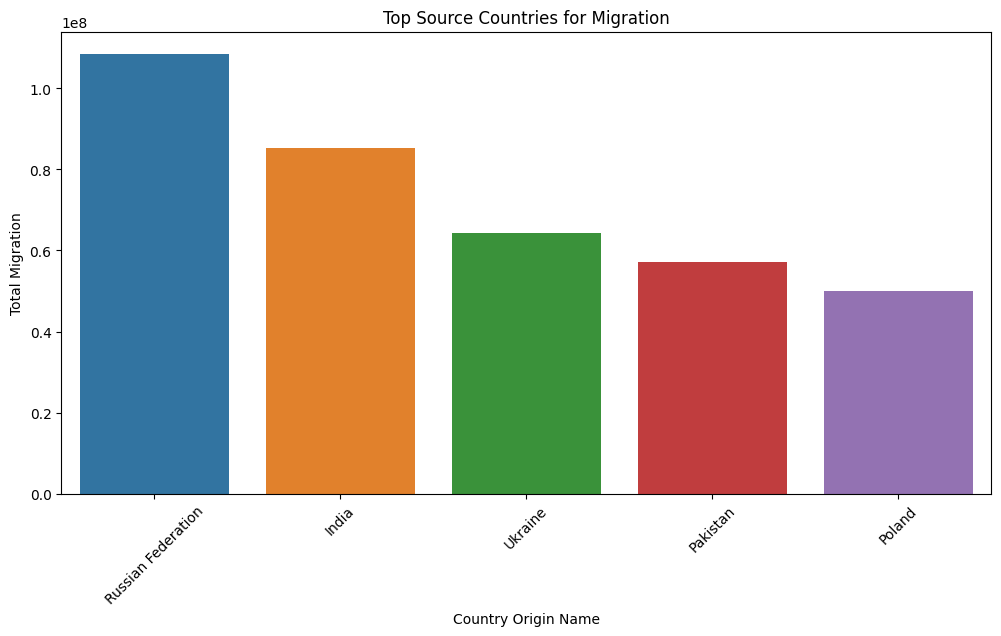

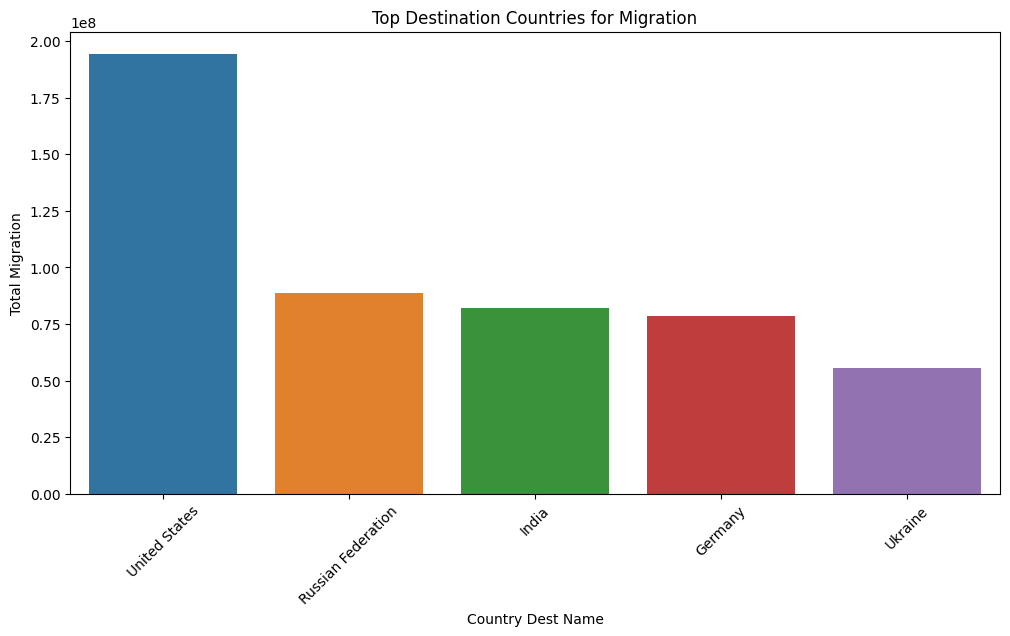

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Primary source countries for migration
source_migration = df.groupby('Country Origin Name')['Total Migration'].sum().reset_index()
source_migration = source_migration.sort_values(by='Total Migration', ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country Origin Name', y='Total Migration', data=source_migration)
plt.title('Top Source Countries for Migration')
plt.xticks(rotation=45)
plt.show()

# 2. Primary destination countries for migration
dest_migration = df.groupby('Country Dest Name')['Total Migration'].sum().reset_index()
dest_migration = dest_migration.sort_values(by='Total Migration', ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country Dest Name', y='Total Migration', data=dest_migration)
plt.title('Top Destination Countries for Migration')
plt.xticks(rotation=45)
plt.show()

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Assuming df is your DataFrame with migration data

# Function to plot based on the top K selected
def plot_migration_top_k(top_k):
    # 1. Primary source countries for migration
    source_migration = df.groupby('Country Origin Name')['Total Migration'].sum().reset_index()
    source_migration = source_migration.sort_values(by='Total Migration', ascending=False).head(top_k)

    plt.figure(figsize=(12, 6))
    plt.bar(source_migration['Country Origin Name'], source_migration['Total Migration'])
    plt.title(f'Top {top_k} Source Countries for Migration')
    plt.xticks(rotation=45)
    plt.xlabel('Country of Origin')
    plt.ylabel('Total Migration')
    plt.show()

    # 2. Primary destination countries for migration
    dest_migration = df.groupby('Country Dest Name')['Total Migration'].sum().reset_index()
    dest_migration = dest_migration.sort_values(by='Total Migration', ascending=False).head(top_k)

    plt.figure(figsize=(12, 6))
    plt.bar(dest_migration['Country Dest Name'], dest_migration['Total Migration'])
    plt.title(f'Top {top_k} Destination Countries for Migration')
    plt.xticks(rotation=45)
    plt.xlabel('Country of Destination')
    plt.ylabel('Total Migration')
    plt.show()

# Dropdown widget for selecting the top K countries
top_k_widget = widgets.IntSlider(min=1, max=20, step=1, value=5, description='Top K Countries')

# Display the widget and link it to the plot function
widgets.interact(plot_migration_top_k, top_k=top_k_widget)


interactive(children=(IntSlider(value=5, description='Top K Countries', max=20, min=1), Output()), _dom_classe…

<function __main__.plot_migration_top_k(top_k)>

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Function to plot based on the top K selected
def plot_migration_top_k(top_k):
    # 1. Primary source countries for migration
    source_migration = df.groupby('Country Origin Name')['Total Migration'].sum().reset_index()
    source_migration['Total Migration'] = source_migration['Total Migration'] / 1_000_000  # Convert to millions
    source_migration = source_migration.sort_values(by='Total Migration', ascending=False).head(top_k)

    plt.figure(figsize=(12, 6))
    plt.bar(source_migration['Country Origin Name'], source_migration['Total Migration'])
    plt.title(f'Top {top_k} Source Countries with highest cumulative migration from 1960-2000')
    plt.xticks(rotation=0)
    plt.xlabel('Country of Origin')
    plt.ylabel('Total Migration (in Millions)')
    plt.show()

    # 2. Primary destination countries for migration
    dest_migration = df.groupby('Country Dest Name')['Total Migration'].sum().reset_index()
    dest_migration['Total Migration'] = dest_migration['Total Migration'] / 1_000_000  # Convert to millions
    dest_migration = dest_migration.sort_values(by='Total Migration', ascending=False).head(top_k)

    plt.figure(figsize=(12, 6))
    plt.bar(dest_migration['Country Dest Name'], dest_migration['Total Migration'])
    plt.title(f'Top {top_k} Destination Countries with highest cumulative migration from 1960-2000')
    plt.xticks(rotation=0)
    plt.xlabel('Country of Destination')
    plt.ylabel('Total Migration (in Millions)')
    plt.show()

# Dropdown widget for selecting the top K countries
top_k_widget = widgets.IntSlider(min=1, max=20, step=1, value=5, description='Select Top K:')

# Display the widget and link it to the plot function
widgets.interact(plot_migration_top_k, top_k=top_k_widget)


interactive(children=(IntSlider(value=5, description='Select Top K:', max=20, min=1), Output()), _dom_classes=…

<function __main__.plot_migration_top_k(top_k)>

In [110]:
df.columns

Index(['Country Origin Name', 'Country Origin Code',
       'Migration by Gender Name', 'Migration by Gender Code',
       'Country Dest Name', 'Country Dest Code', '1960', '1970', '1980',
       '1990', '2000', 'Total Migration'],
      dtype='object')

In [111]:
df['Migration by Gender Name'].unique()

array(['Total', 'Female', 'Male'], dtype=object)

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Function to plot based on the top K and gender selected
def plot_migration_top_k_gender(top_k, gender):
    # Filter data based on gender
    filtered_df = df[df['Migration by Gender Name'] == gender] if gender != 'Total' else df

    # 1. Primary source countries for migration
    source_migration = filtered_df.groupby('Country Origin Name')['Total Migration'].sum().reset_index()
    source_migration['Total Migration'] = source_migration['Total Migration'] / 1_000_000  # Convert to millions
    source_migration = source_migration.sort_values(by='Total Migration', ascending=False).head(top_k)

    plt.figure(figsize=(12, 6))
    plt.bar(source_migration['Country Origin Name'], source_migration['Total Migration'])
    plt.title(f'Top {top_k} Source Countries for Migration ({gender})')
    plt.xticks(rotation=0)
    plt.xlabel('Country of Origin')
    plt.ylabel('Total Migration (in Millions)')
    plt.show()

    # 2. Primary destination countries for migration
    dest_migration = filtered_df.groupby('Country Dest Name')['Total Migration'].sum().reset_index()
    dest_migration['Total Migration'] = dest_migration['Total Migration'] / 1_000_000  # Convert to millions
    dest_migration = dest_migration.sort_values(by='Total Migration', ascending=False).head(top_k)

    plt.figure(figsize=(12, 6))
    plt.bar(dest_migration['Country Dest Name'], dest_migration['Total Migration'])
    plt.title(f'Top {top_k} Destination Countries for Migration ({gender})')
    plt.xticks(rotation=0)
    plt.xlabel('Country of Destination')
    plt.ylabel('Total Migration (in Millions)')
    plt.show()

# Dropdown widget for selecting the top K countries
top_k_widget = widgets.IntSlider(min=1, max=20, step=1, value=5, description='Select Top K:')

# Dropdown widget for gender selection with default set to 'Total'
gender_widget = widgets.Dropdown(
    options=['Total', 'Male', 'Female'],
    value='Total',
    description='Gender',
)

# Display the widgets and link them to the plot function
widgets.interact(plot_migration_top_k_gender, top_k=top_k_widget, gender=gender_widget)


interactive(children=(IntSlider(value=5, description='Select Top K:', max=20, min=1), Dropdown(description='Ge…

<function __main__.plot_migration_top_k_gender(top_k, gender)>

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Function to plot and save based on the top K and gender selected
def plot_and_save_migration_top_k_gender(top_k, gender, save=False):
    # Filter data based on gender
    filtered_df = df[df['Migration by Gender Name'] == gender] if gender != 'Total' else df

    # 1. Primary source countries for migration
    source_migration = filtered_df.groupby('Country Origin Name')['Total Migration'].sum().reset_index()
    source_migration['Total Migration'] = source_migration['Total Migration'] / 1_000_000  # Convert to millions
    source_migration = source_migration.sort_values(by='Total Migration', ascending=False).head(top_k)

    plt.figure(figsize=(12, 6))
    plt.bar(source_migration['Country Origin Name'], source_migration['Total Migration'])
    plt.title(f'Top {top_k} Source Countries for Migration ({gender})')
    plt.xticks(rotation=0)
    plt.xlabel('Country of Origin')
    plt.ylabel('Total Migration (in Millions)')
    
    # Save the plot as a high-resolution image if save=True
    if save:
        plt.savefig(f'migration_source_{gender}_{top_k}.png', dpi=300, bbox_inches='tight')

    plt.show()

    # 2. Primary destination countries for migration
    dest_migration = filtered_df.groupby('Country Dest Name')['Total Migration'].sum().reset_index()
    dest_migration['Total Migration'] = dest_migration['Total Migration'] / 1_000_000  # Convert to millions
    dest_migration = dest_migration.sort_values(by='Total Migration', ascending=False).head(top_k)

    plt.figure(figsize=(12, 6))
    plt.bar(dest_migration['Country Dest Name'], dest_migration['Total Migration'])
    plt.title(f'Top {top_k} Destination Countries for Migration ({gender})')
    plt.xticks(rotation=0)
    plt.xlabel('Country of Destination')
    plt.ylabel('Total Migration (in Millions)')
    
    # Save the plot as a high-resolution image if save=True
    if save:
        plt.savefig(f'migration_dest_{gender}_{top_k}.png', dpi=300, bbox_inches='tight')

    plt.show()

# Dropdown widget for selecting the top K countries
top_k_widget = widgets.IntSlider(min=1, max=20, step=1, value=5, description='Top K Countries')

# Dropdown widget for gender selection with default set to 'Total'
gender_widget = widgets.Dropdown(
    options=['Total', 'Male', 'Female'],
    value='Total',
    description='Gender',
)

# Checkbox widget for enabling/disabling save functionality
save_widget = widgets.Checkbox(value=False, description='Save Plot')

# Display the widgets and link them to the plot function
widgets.interact(plot_and_save_migration_top_k_gender, top_k=top_k_widget, gender=gender_widget, save=save_widget)


interactive(children=(IntSlider(value=5, description='Top K Countries', max=20, min=1), Dropdown(description='…

<function __main__.plot_and_save_migration_top_k_gender(top_k, gender, save=False)>

In [114]:
df.columns

Index(['Country Origin Name', 'Country Origin Code',
       'Migration by Gender Name', 'Migration by Gender Code',
       'Country Dest Name', 'Country Dest Code', '1960', '1970', '1980',
       '1990', '2000', 'Total Migration'],
      dtype='object')

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Function to plot based on the top K, gender, and year selected
def plot_migration_top_k_gender_year(top_k, gender, year):
    # Filter data based on gender
    filtered_df = df[df['Migration by Gender Name'] == gender] if gender != 'Total' else df

    # Check if 'Total' is selected for year and use 'Total Migration', otherwise use the selected year column
    if year == 'Total':
        source_migration = filtered_df.groupby('Country Origin Name')['Total Migration'].sum().reset_index()
        dest_migration = filtered_df.groupby('Country Dest Name')['Total Migration'].sum().reset_index()
        y_label = 'Total Migration (in Millions)'
    else:
        source_migration = filtered_df.groupby('Country Origin Name')[year].sum().reset_index()
        dest_migration = filtered_df.groupby('Country Dest Name')[year].sum().reset_index()
        y_label = f'Migration in {year} (in Millions)'

    # Convert to millions for both source and destination
    source_migration[year if year != 'Total' else 'Total Migration'] /= 1_000_000
    dest_migration[year if year != 'Total' else 'Total Migration'] /= 1_000_000

    # Sort and select top K for both source and destination
    source_migration = source_migration.sort_values(by=year if year != 'Total' else 'Total Migration', ascending=False).head(top_k)
    dest_migration = dest_migration.sort_values(by=year if year != 'Total' else 'Total Migration', ascending=False).head(top_k)

    # Plot for source countries
    plt.figure(figsize=(12, 6))
    plt.bar(source_migration['Country Origin Name'], source_migration[year if year != 'Total' else 'Total Migration'])
    plt.title(f'Top {top_k} Source Countries for Migration ({gender}, {year})')
    plt.xticks(rotation=0)
    plt.xlabel('Country of Origin')
    plt.ylabel(y_label)
    plt.show()

    # Plot for destination countries
    plt.figure(figsize=(12, 6))
    plt.bar(dest_migration['Country Dest Name'], dest_migration[year if year != 'Total' else 'Total Migration'])
    plt.title(f'Top {top_k} Destination Countries for Migration ({gender}, {year})')
    plt.xticks(rotation=0)
    plt.xlabel('Country of Destination')
    plt.ylabel(y_label)
    plt.show()

# Dropdown widget for selecting the top K countries
top_k_widget = widgets.IntSlider(min=1, max=20, step=1, value=5, description='Select Top K:')

# Dropdown widget for gender selection with default set to 'Total'
gender_widget = widgets.Dropdown(
    options=['Total', 'Male', 'Female'],
    value='Total',
    description='Gender',
)

# Dropdown widget for year selection with 'Total' as an option
year_widget = widgets.Dropdown(
    options=['Total', '1960', '1970', '1980', '1990', '2000'],
    value='Total',
    description='Year',
)

# Display the widgets and link them to the plot function
widgets.interact(plot_migration_top_k_gender_year, top_k=top_k_widget, gender=gender_widget, year=year_widget)


interactive(children=(IntSlider(value=5, description='Select Top K:', max=20, min=1), Dropdown(description='Ge…

<function __main__.plot_migration_top_k_gender_year(top_k, gender, year)>

In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Function to plot based on the top K, gender, and year selected
def plot_migration_top_k_gender_year(top_k, gender, year):
    # Filter data based on gender
    filtered_df = df[df['Migration by Gender Name'] == gender] if gender != 'Total' else df

    # Check if 'Total' is selected for year and use 'Total Migration', otherwise use the selected year column
    if year == 'Total':
        source_migration = filtered_df.groupby('Country Origin Name')['Total Migration'].sum().reset_index()
        dest_migration = filtered_df.groupby('Country Dest Name')['Total Migration'].sum().reset_index()
        y_label = 'Total Migration (in Millions)'
    else:
        source_migration = filtered_df.groupby('Country Origin Name')[year].sum().reset_index()
        dest_migration = filtered_df.groupby('Country Dest Name')[year].sum().reset_index()
        y_label = f'Migration in {year} (in Millions)'

    # Convert to millions for both source and destination
    source_migration[year if year != 'Total' else 'Total Migration'] /= 1_000_000
    dest_migration[year if year != 'Total' else 'Total Migration'] /= 1_000_000

    # Sort and select top K for both source and destination
    source_migration = source_migration.sort_values(by=year if year != 'Total' else 'Total Migration', ascending=False).head(top_k)
    dest_migration = dest_migration.sort_values(by=year if year != 'Total' else 'Total Migration', ascending=False).head(top_k)

    # Plot for source countries
    plt.figure(figsize=(12, 6))
    plt.bar(source_migration['Country Origin Name'], source_migration[year if year != 'Total' else 'Total Migration'])
    plt.title(f'Top {top_k} Source Countries for Migration ({gender}, {year})')
    plt.xticks(rotation=0)
    plt.xlabel('Country of Origin')
    plt.ylabel(y_label)
    plt.show()

    # Plot for destination countries
    plt.figure(figsize=(12, 6))
    plt.bar(dest_migration['Country Dest Name'], dest_migration[year if year != 'Total' else 'Total Migration'])
    plt.title(f'Top {top_k} Destination Countries for Migration ({gender}, {year})')
    plt.xticks(rotation=45)
    plt.xlabel('Country of Destination')
    plt.ylabel(y_label)
    plt.show()

# Dropdown widget for selecting the top K countries, limited to 10
top_k_widget = widgets.IntSlider(min=1, max=10, step=1, value=5, description='Select Top K:')

# Dropdown widget for gender selection with default set to 'Total'
gender_widget = widgets.Dropdown(
    options=['Total', 'Male', 'Female'],
    value='Total',
    description='Gender',
)

# Dropdown widget for year selection with 'Total' as an option
year_widget = widgets.Dropdown(
    options=['Total', '1960', '1970', '1980', '1990', '2000'],
    value='Total',
    description='Year',
)

# Display the widgets and link them to the plot function
widgets.interact(plot_migration_top_k_gender_year, top_k=top_k_widget, gender=gender_widget, year=year_widget)


interactive(children=(IntSlider(value=5, description='Select Top K:', max=10, min=1), Dropdown(description='Ge…

<function __main__.plot_migration_top_k_gender_year(top_k, gender, year)>

In [12]:
import plotly.express as px
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Function to prepare migration data by decade
def prepare_decade_migration(gender):
    # Filter data based on gender
    filtered_df = df[df['Migration by Gender Name'] == gender] if gender != 'Total' else df
    
    # Summing the decade columns
    decade_migration = filtered_df[['1960', '1970', '1980', '1990', '2000']].sum().reset_index()
    decade_migration.columns = ['Decade', 'Total Migration']
    
    # Convert 'Total Migration' to millions
    decade_migration['Total Migration'] = decade_migration['Total Migration'] / 1_000_000
    
    return decade_migration

# Function to create and display interactive plot
def plot_migration_trends(gender):
    # Prepare data
    decade_migration = prepare_decade_migration(gender)
    
    # Create Plotly line plot with hover tips
    fig = px.line(
        decade_migration, 
        x='Decade', 
        y='Total Migration', 
        title=f'Migration Trends by Decade ({gender})',
        markers=True,
        labels={'Total Migration': 'Total Migration (in Millions)'},
        hover_name='Decade',
        hover_data={'Total Migration': ':.2f'}  # Hover tip showing the value with 2 decimal places
    )
    
    fig.update_layout(
        xaxis_title="Decade",
        yaxis_title="Total Migration (in Millions)",
        title_x=0.5,
        template="simple_white"
    )
    
    fig.show()

# Dropdown widget for gender selection with default set to 'Total'
gender_widget = widgets.Dropdown(
    options=['Total', 'Male', 'Female'],
    value='Total',
    description='Gender',
)

# Display the widget and link it to the plot function
widgets.interact(plot_migration_trends, gender=gender_widget)


interactive(children=(Dropdown(description='Gender', options=('Total', 'Male', 'Female'), value='Total'), Outp…

<function __main__.plot_migration_trends(gender)>

In [13]:
import ipywidgets as widgets
from IPython.display import display
origin_widget = widgets.Dropdown(
    options=df['Country Origin Name'].unique(),
    description='Origin:',
    disabled=False,
)

dest_widget = widgets.Dropdown(
    options=df['Country Dest Name'].unique(),
    description='Destination:',
    disabled=False,
)

# Function to update the plot based on widget values
def update_plot(origin, dest):
    filtered_df = df[(df['Country Origin Name'] == origin) & (df['Country Dest Name'] == dest)]
    decade_migration = filtered_df[['1960', '1970', '1980', '1990', '2000']].sum().reset_index()
    decade_migration.columns = ['Decade', 'Total Migration']
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Decade', y='Total Migration', data=decade_migration, marker='o')
    plt.title(f'Migration Trends by Decade for {origin} to {dest}')
    plt.show()

# Set up interactive widgets
interactive_plot = widgets.interactive(update_plot, origin=origin_widget, dest=dest_widget)

# Display widgets and the plot
display(interactive_plot)

interactive(children=(Dropdown(description='Origin:', options=('Afghanistan', 'Albania', 'Algeria', 'American …

In [46]:
df.columns

Index(['Country Origin Name', 'Country Origin Code',
       'Migration by Gender Name', 'Migration by Gender Code',
       'Country Dest Name', 'Country Dest Code', '1960', '1970', '1980',
       '1990', '2000', 'Total Migration'],
      dtype='object')

In [47]:
df['Migration by Gender Name']

0         Total
1         Total
2         Total
3         Total
4         Total
          ...  
160771     Male
160772     Male
160773     Male
160774     Male
160775     Male
Name: Migration by Gender Name, Length: 160776, dtype: object

In [14]:
import plotly.express as px
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Function to prepare migration data by decade, source or destination, and gender
def prepare_decade_migration(source_or_dest):
    # Group by the selected column (source or destination)
    if source_or_dest == "Source":
        filtered_df = df.groupby(['Country Origin Name', 'Migration by Gender Name'])[['1960', '1970', '1980', '1990', '2000']].sum().reset_index()
    else:
        filtered_df = df.groupby(['Country Dest Name', 'Migration by Gender Name'])[['1960', '1970', '1980', '1990', '2000']].sum().reset_index()

    # Filter out 'Total' from 'Migration by Gender Name' and keep only 'Male' and 'Female'
    filtered_df = filtered_df[filtered_df['Migration by Gender Name'].isin(['Male', 'Female'])]
    
    # Sum the decade columns by gender
    decade_migration = filtered_df.groupby('Migration by Gender Name')[['1960', '1970', '1980', '1990', '2000']].sum().T
    decade_migration.columns = ['Male', 'Female']
    
    # Convert to millions
    decade_migration['Male'] = decade_migration['Male'] / 1_000_000
    decade_migration['Female'] = decade_migration['Female'] / 1_000_000
    decade_migration = decade_migration.reset_index()
    decade_migration.columns = ['Decade', 'Male', 'Female']
    
    return decade_migration

# Function to create and display interactive plot for source or destination migration trends
def plot_migration_trends(source_or_dest):
    # Prepare the data
    decade_migration = prepare_decade_migration(source_or_dest)
    
    # Create a Plotly line plot with both male and female migration trends
    fig = px.line(
        decade_migration, 
        x='Decade', 
        y=['Male', 'Female'], 
        title=f'{source_or_dest} Migration Trends by Decade (Male and Female)',
        markers=True,
        labels={'value': 'Total Migration (in Millions)', 'variable': 'Gender'},
        hover_name='Decade',
        hover_data={'value': ':.2f'}
    )
    
    # Update layout for aesthetic
    fig.update_layout(
        xaxis_title="Decade",
        yaxis_title="Total Migration (in Millions)",
        title_x=0.5,
        template="simple_white",
        legend_title_text='Gender'
    )
    
    fig.show()

# Dropdown widget for selecting source or destination
source_dest_widget = widgets.Dropdown(
    options=['Source', 'Destination'],
    value='Source',
    description='Type',
)

# Display the widget and link it to the plot function
widgets.interact(plot_migration_trends, source_or_dest=source_dest_widget)


interactive(children=(Dropdown(description='Type', options=('Source', 'Destination'), value='Source'), Output(…

<function __main__.plot_migration_trends(source_or_dest)>

In [49]:
df.columns

Index(['Country Origin Name', 'Country Origin Code',
       'Migration by Gender Name', 'Migration by Gender Code',
       'Country Dest Name', 'Country Dest Code', '1960', '1970', '1980',
       '1990', '2000', 'Total Migration'],
      dtype='object')

In [15]:
import plotly.express as px
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Function to prepare migration data by decade, source or destination, gender, and country
def prepare_decade_migration(source_or_dest, country):
    # Group by the selected column (source or destination)
    if source_or_dest == "Source":
        filtered_df = df[df['Country Origin Name'] == country].groupby(['Country Origin Name', 'Migration by Gender Name'])[['1960', '1970', '1980', '1990', '2000']].sum().reset_index()
    else:
        filtered_df = df[df['Country Dest Name'] == country].groupby(['Country Dest Name', 'Migration by Gender Name'])[['1960', '1970', '1980', '1990', '2000']].sum().reset_index()

    # Filter out 'Total' from 'Migration by Gender Name' and keep only 'Male' and 'Female'
    filtered_df = filtered_df[filtered_df['Migration by Gender Name'].isin(['Male', 'Female'])]
    
    # Sum the decade columns by gender
    decade_migration = filtered_df.groupby('Migration by Gender Name')[['1960', '1970', '1980', '1990', '2000']].sum().T
    decade_migration.columns = ['Male', 'Female']
    
    # Convert to millions
    decade_migration['Male'] = decade_migration['Male'] / 1_000_000
    decade_migration['Female'] = decade_migration['Female'] / 1_000_000
    decade_migration = decade_migration.reset_index()
    decade_migration.columns = ['Decade', 'Male', 'Female']
    
    return decade_migration

# Function to update country dropdown based on source/destination selection
def update_country_options(source_or_dest):
    if source_or_dest == "Source":
        country_options = df['Country Origin Name'].unique()
    else:
        country_options = df['Country Dest Name'].unique()
    
    # Update the country dropdown options
    country_widget.options = country_options
    country_widget.value = country_options[0]  # Set the default to the first option

# Function to create and display interactive plot for migration trends with country filter
def plot_migration_trends(source_or_dest, country):
    # Prepare the data
    decade_migration = prepare_decade_migration(source_or_dest, country)
    
    # Create a Plotly line plot with both male and female migration trends
    fig = px.line(
        decade_migration, 
        x='Decade', 
        y=['Male', 'Female'], 
        title=f'{source_or_dest} Migration Trends by Decade (Male and Female) - {country}',
        markers=True,
        labels={'value': 'Total Migration (in Millions)', 'variable': 'Gender'},
        hover_name='Decade',
        hover_data={'value': ':.2f'}
    )
    
    # Update layout for aesthetic
    fig.update_layout(
        xaxis_title="Decade",
        yaxis_title="Total Migration (in Millions)",
        title_x=0.5,
        template="simple_white",
        legend_title_text='Gender'
    )
    
    fig.show()

# Dropdown widget for selecting source or destination
source_dest_widget = widgets.Dropdown(
    options=['Source', 'Destination'],
    value='Source',
    description='Type',
)

# Dropdown widget for selecting country
country_widget = widgets.Dropdown(
    options=df['Country Origin Name'].unique(),  # Initially populate with 'Country Origin Name'
    value=df['Country Origin Name'].unique()[0],
    description='Country',
)

# Update the country dropdown options when 'Source' or 'Destination' is changed
def on_source_dest_change(change):
    update_country_options(change['new'])

source_dest_widget.observe(on_source_dest_change, names='value')

# Display the widgets and link them to the plot function
widgets.interact(plot_migration_trends, source_or_dest=source_dest_widget, country=country_widget)


interactive(children=(Dropdown(description='Type', options=('Source', 'Destination'), value='Source'), Dropdow…

<function __main__.plot_migration_trends(source_or_dest, country)>

In [16]:
import plotly.express as px
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Function to prepare migration data by decade, gender, source country, and destination country
def prepare_decade_migration(source_country, dest_country):
    # Filter by the selected source and destination countries
    filtered_df = df[(df['Country Origin Name'] == source_country) & (df['Country Dest Name'] == dest_country)]

    # Filter out 'Total' from 'Migration by Gender Name' and keep only 'Male' and 'Female'
    filtered_df = filtered_df[filtered_df['Migration by Gender Name'].isin(['Male', 'Female'])]

    # Sum the decade columns by gender
    decade_migration = filtered_df.groupby('Migration by Gender Name')[['1960', '1970', '1980', '1990', '2000']].sum().T
    decade_migration.columns = ['Male', 'Female']
    
    # Convert to millions
    decade_migration['Male'] = decade_migration['Male'] / 1_000_000
    decade_migration['Female'] = decade_migration['Female'] / 1_000_000
    decade_migration = decade_migration.reset_index()
    decade_migration.columns = ['Decade', 'Male', 'Female']
    
    return decade_migration

# Function to create and display interactive plot for migration trends from source to destination
def plot_migration_trends(source_country, dest_country):
    # Check if both source and destination are selected
    if source_country and dest_country:
        # Prepare the data
        decade_migration = prepare_decade_migration(source_country, dest_country)
        
        # Create a Plotly line plot with both male and female migration trends
        fig = px.line(
            decade_migration, 
            x='Decade', 
            y=['Male', 'Female'], 
            title=f'Migration Trends from {source_country} to {dest_country} by Decade (Male and Female)',
            markers=True,
            labels={'value': 'Total Migration (in Millions)', 'variable': 'Gender'},
            hover_name='Decade',
            hover_data={'value': ':.2f'}
        )
        
        # Update layout for aesthetic
        fig.update_layout(
            xaxis_title="Decade",
            yaxis_title="Total Migration (in Millions)",
            title_x=0.5,
            template="simple_white",
            legend_title_text='Gender'
        )
        
        fig.show()

# Dropdown widget for selecting source country
source_country_widget = widgets.Dropdown(
    options=df['Country Origin Name'].unique(),
    value=df['Country Origin Name'].unique()[0],
    description='Source:',
)

# Dropdown widget for selecting destination country
dest_country_widget = widgets.Dropdown(
    options=df['Country Dest Name'].unique(),
    value=df['Country Dest Name'].unique()[0],
    description='Destination:',
)

# Display the widgets and link them to the plot function
widgets.interact(plot_migration_trends, source_country=source_country_widget, dest_country=dest_country_widget)


interactive(children=(Dropdown(description='Source:', options=('Afghanistan', 'Albania', 'Algeria', 'American …

<function __main__.plot_migration_trends(source_country, dest_country)>

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Function to get top K source and destination countries for a selected country
def prepare_top_k_migration(selected_country, top_k):
    # Top K source countries (countries that send people to the selected country)
    top_k_sources = df[df['Country Dest Name'] == selected_country].groupby('Country Origin Name')['Total Migration'].sum().nlargest(top_k).reset_index()
    
    # Top K destination countries (countries where people migrate to from the selected country)
    top_k_destinations = df[df['Country Origin Name'] == selected_country].groupby('Country Dest Name')['Total Migration'].sum().nlargest(top_k).reset_index()
    
    return top_k_sources, top_k_destinations

# Function to create and display side-by-side bar plots for top K source and destination countries
def plot_top_k_migration(selected_country, top_k):
    # Prepare the data
    top_k_sources, top_k_destinations = prepare_top_k_migration(selected_country, top_k)
    
    # Create the figure with two subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=[f'Top {top_k} Source Countries to {selected_country}', 
                                                        f'Top {top_k} Destination Countries from {selected_country}'])
    
    # Bar plot for top K source countries
    fig.add_trace(go.Bar(x=top_k_sources['Country Origin Name'], y=top_k_sources['Total Migration'] / 1_000_000, 
                         name='Source Countries', marker_color='blue'), row=1, col=1)
    
    # Bar plot for top K destination countries
    fig.add_trace(go.Bar(x=top_k_destinations['Country Dest Name'], y=top_k_destinations['Total Migration'] / 1_000_000, 
                         name='Destination Countries', marker_color='green'), row=1, col=2)
    
    # Update layout for the figure
    fig.update_layout(title_text=f'Top {top_k} Source and Destination Countries for {selected_country}', 
                      showlegend=False, 
                      xaxis_title='Country', 
                      yaxis_title='Total Migration (in Millions)',
                      height=500, width=1000)
    
    fig.show()

# Dropdown widget for selecting the country
country_widget = widgets.Dropdown(
    options=df['Country Origin Name'].unique(),
    value=df['Country Origin Name'].unique()[0],
    description='Country',
)

# Slider widget for selecting the top K countries
top_k_widget = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Top K',
)

# Display the widgets and link them to the plot function
widgets.interact(plot_top_k_migration, selected_country=country_widget, top_k=top_k_widget)


interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'American …

<function __main__.plot_top_k_migration(selected_country, top_k)>

In [57]:
df.columns

Index(['Country Origin Name', 'Country Origin Code',
       'Migration by Gender Name', 'Migration by Gender Code',
       'Country Dest Name', 'Country Dest Code', '1960', '1970', '1980',
       '1990', '2000', 'Total Migration'],
      dtype='object')

interactive(children=(Dropdown(description='selected_country', options=('Afghanistan', 'Albania', 'Algeria', '…

<function __main__.plot_top_k_migration(selected_country, top_k, gender, year)>

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Function to get top K source and destination countries for a selected country, gender, and year
def prepare_top_k_migration(selected_country, top_k, gender, year):
    # Filter data by gender
    filtered_df = df[df['Migration by Gender Name'] == gender]
    
    # Filter by the selected year or total migration
    if year != 'Total Migration':
        filtered_df = filtered_df[['Country Origin Name', 'Country Dest Name', year]].rename(columns={year: 'Total Migration'})
    
    # Top K source countries (countries that send people to the selected country)
    top_k_sources = filtered_df[filtered_df['Country Dest Name'] == selected_country].groupby('Country Origin Name')['Total Migration'].sum().nlargest(top_k).reset_index()
    
    # Top K destination countries (countries where people migrate to from the selected country)
    top_k_destinations = filtered_df[filtered_df['Country Origin Name'] == selected_country].groupby('Country Dest Name')['Total Migration'].sum().nlargest(top_k).reset_index()
    
    return top_k_sources, top_k_destinations

# Function to create and display side-by-side bar plots for top K source and destination countries
def plot_top_k_migration(selected_country, top_k, gender, year):
    # Prepare the data
    top_k_sources, top_k_destinations = prepare_top_k_migration(selected_country, int(top_k), gender, year)
    
    # Create the figure with two subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=[f'Top {top_k} Source Countries to {selected_country}', 
                                                        f'Top {top_k} Destination Countries from {selected_country}'])
    
    # Bar plot for top K source countries
    fig.add_trace(go.Bar(x=top_k_sources['Country Origin Name'], y=top_k_sources['Total Migration'] / 1_000_000, 
                         name='Source Countries', marker_color='blue'), row=1, col=1)
    
    # Bar plot for top K destination countries
    fig.add_trace(go.Bar(x=top_k_destinations['Country Dest Name'], y=top_k_destinations['Total Migration'] / 1_000_000, 
                         name='Destination Countries', marker_color='green'), row=1, col=2)
    
    # Update layout for the figure
    fig.update_layout(title_text=f'Top {top_k} Source and Destination Countries for {selected_country} ({gender}, {year})', 
                      showlegend=False, 
                      xaxis_title='', 
                      yaxis_title='Total Migration (in Millions)',
                      height=500, width=1000)
    
    fig.show()

# Dropdown widget for selecting the country
country_widget = widgets.Dropdown(
    options=df['Country Origin Name'].unique(),
    value=df['Country Origin Name'].unique()[0],
)

# Dropdown widget for selecting top K countries
top_k_widget = widgets.Dropdown(
    options=[str(i) for i in range(1, 11)],  # Options from 1 to 10 as strings
    value='5',
    description='Top K',
)

# Dropdown widget for selecting gender
gender_widget = widgets.Dropdown(
    options=['Total', 'Male', 'Female'],
    value='Total',
    description='Gender',
)

# Dropdown widget for selecting year
year_widget = widgets.Dropdown(
    options=['1960', '1970', '1980', '1990', '2000', 'Total Migration'],
    value='Total Migration',
    description='Year',
)

# Display the widgets and link them to the plot function
widgets.interact(plot_top_k_migration, selected_country=country_widget, top_k=top_k_widget, gender=gender_widget, year=year_widget)


interactive(children=(Dropdown(description='selected_country', options=('Afghanistan', 'Albania', 'Algeria', '…

<function __main__.plot_top_k_migration(selected_country, top_k, gender, year)>

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Function to get top K source and destination countries for a selected country, gender, and year
def prepare_top_k_migration(selected_country, top_k, gender, year):
    # Filter data by gender
    filtered_df = df[df['Migration by Gender Name'] == gender]
    
    # Filter by the selected year or total migration
    if year != 'Total Migration':
        filtered_df = filtered_df[['Country Origin Name', 'Country Dest Name', year]].rename(columns={year: 'Total Migration'})
    
    # Top K source countries (countries that send people to the selected country)
    top_k_sources = filtered_df[filtered_df['Country Dest Name'] == selected_country].groupby('Country Origin Name')['Total Migration'].sum().nlargest(top_k).reset_index()
    
    # Top K destination countries (countries where people migrate to from the selected country)
    top_k_destinations = filtered_df[filtered_df['Country Origin Name'] == selected_country].groupby('Country Dest Name')['Total Migration'].sum().nlargest(top_k).reset_index()
    
    return top_k_sources, top_k_destinations

# Function to create and display side-by-side bar plots for top K source and destination countries
def plot_top_k_migration(selected_country, top_k, gender, year):
    # Prepare the data
    top_k_sources, top_k_destinations = prepare_top_k_migration(selected_country, int(top_k), gender, year)
    
    # Create the figure with two subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=[f'Top {top_k} Source Countries to {selected_country}', 
                                                        f'Top {top_k} Destination Countries from {selected_country}'])
    
    # Bar plot for top K source countries
    fig.add_trace(go.Bar(x=top_k_sources['Country Origin Name'], y=top_k_sources['Total Migration'] / 1_000_000, 
                         name='Source Countries', marker_color='blue'), row=1, col=1)
    
    # Bar plot for top K destination countries
    fig.add_trace(go.Bar(x=top_k_destinations['Country Dest Name'], y=top_k_destinations['Total Migration'] / 1_000_000, 
                         name='Destination Countries', marker_color='green'), row=1, col=2)
    
    # Update layout for the figure
    fig.update_layout(title_text=f'Top {top_k} Source and Destination Countries for {selected_country} ({gender}, {year})', 
                      showlegend=False, 
                      xaxis_title='', 
                      yaxis_title='Total Migration (in Millions)',
                      height=500, width=1000)
    
    fig.show()

# Dropdown widget for selecting the country
country_widget = widgets.Dropdown(
    options=df['Country Origin Name'].unique(),
    value=df['Country Origin Name'].unique()[0],
    description='Country',
)

# Dropdown widget for selecting top K countries
top_k_widget = widgets.Dropdown(
    options=[str(i) for i in range(1, 11)],  # Options from 1 to 10 as strings
    value='5',
    description='Top K',
)

# Dropdown widget for selecting gender
gender_widget = widgets.Dropdown(
    options=['Total', 'Male', 'Female'],
    value='Total',
    description='Gender',
)

# Dropdown widget for selecting year
year_widget = widgets.Dropdown(
    options=['1960', '1970', '1980', '1990', '2000', 'Total Migration'],
    value='Total Migration',
    description='Year',
)

# Display the widgets and link them to the plot function
widgets.interact(plot_top_k_migration, selected_country=country_widget, top_k=top_k_widget, gender=gender_widget, year=year_widget)


interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'American …

<function __main__.plot_top_k_migration(selected_country, top_k, gender, year)>

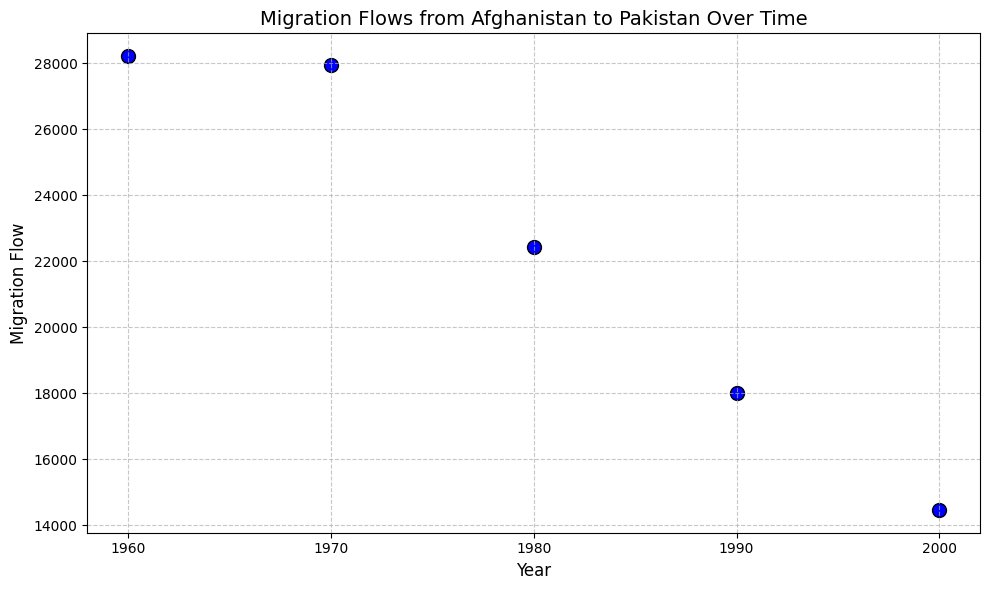

In [66]:
country_1 = 'Afghanistan'
country_2 = 'Pakistan'

filtered_df = df[(df['Country Origin Name'] == country_1) & 
                     (df['Country Dest Name'] == country_2) & 
                     (df['Migration by Gender Name'] == 'Total')]

# Extract relevant columns (years and migration flow)
years = ['1960', '1970', '1980', '1990', '2000']
migration_flows = filtered_df[years].values.flatten()

# Create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, migration_flows, color='b', s=100, edgecolor='k')

# Add labels and title
plt.title(f'Migration Flows from {country_1} to {country_2} Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Migration Flow', fontsize=12)

# Aesthetic improvements
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

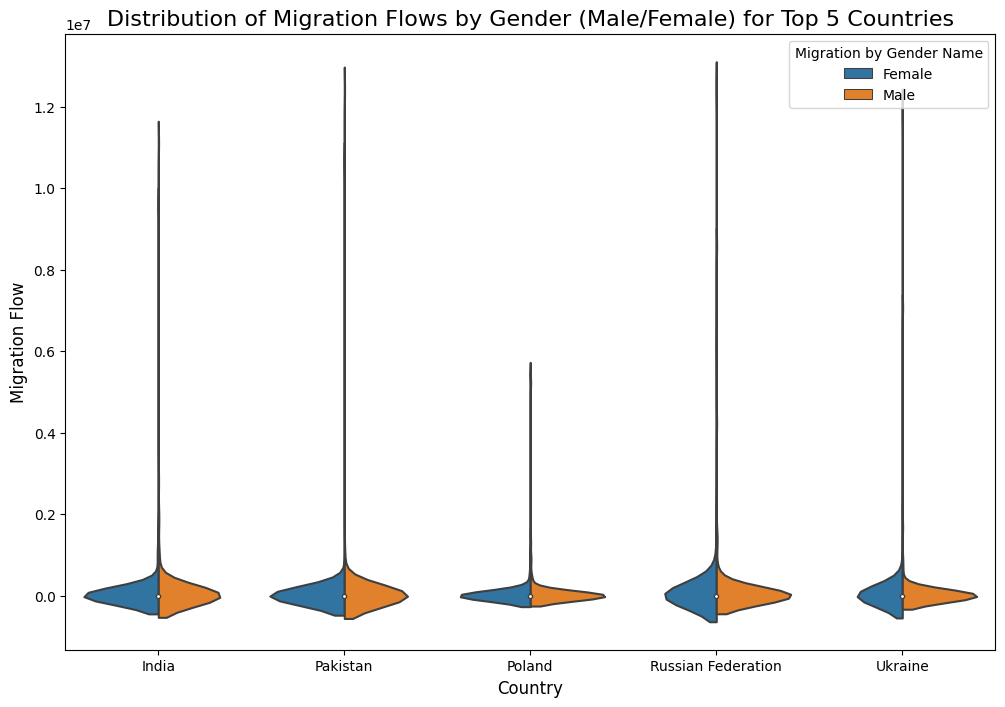

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the 'Total' gender category
filtered_data = df[(df['Country Origin Name'].isin(top_5_countries)) & (df['Migration by Gender Name'] != 'Total')]

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Country Origin Name', y='Total Migration', hue='Migration by Gender Name', data=filtered_data, split=True)

# Adding titles and labels
plt.title('Distribution of Migration Flows by Gender (Male/Female) for Top 5 Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Migration Flow', fontsize=12)

# Show plot
plt.show()


In [74]:
for year in ['1960', '1970', '1980', '1990', '2000']:
    df[year] = pd.to_numeric(df[year], errors='coerce').fillna(0).astype(int)

# Correctly calculate 'Total Migration' column
df['Total Migration'] = df[['1960', '1970', '1980', '1990', '2000']].sum(axis=1)

# Calculate total migration for each corridor
total_migration = df.groupby(['Country Origin Name', 'Country Dest Name'])['Total Migration'].sum().reset_index()

# Function to create and save the map
def create_and_save_map(top_n):
    top_corridors = total_migration.sort_values(by='Total Migration', ascending=False).head(top_n)
    fig = go.Figure()

    for _, row in top_corridors.iterrows():
        origin = row['Country Origin Name']
        dest = row['Country Dest Name']
        if origin in country_coords and dest in country_coords:
            origin_coords = country_coords[origin]
            dest_coords = country_coords[dest]

            fig.add_trace(go.Scattergeo(
                locationmode='country names',
                lon=[origin_coords[1], dest_coords[1]],
                lat=[origin_coords[0], dest_coords[0]],
                mode='lines+markers+text',
                text=[origin, dest],
                hoverinfo='text',
                line=dict(width=2, color='blue'),
                marker=dict(size=5),
                name=f'{origin} to {dest}'
            ))

    fig.update_layout(
        title=f'Top {top_n} Migration Corridors',
        showlegend=True,
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='equirectangular'
        ),
    )

    # Save as HTML file
    file_name = f"top_{top_n}_migration_corridors.html"
    fig.write_html(file_name)
    print(f"Map saved as {file_name}")

# Create a slider widget
top_n_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='Top N Corridors')

# Display the slider and update the map when the value changes
def update_map(top_n):
    create_and_save_map(top_n)

widgets.interact(update_map, top_n=top_n_slider)
display(top_n_slider)

interactive(children=(IntSlider(value=5, description='Top N Corridors', max=20, min=1), Output()), _dom_classe…

IntSlider(value=5, description='Top N Corridors', max=20, min=1)

In [20]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame
# Calculate total migration for each corridor
df['Total Migration'] = df[['1960', '1970', '1980', '1990', '2000']].sum(axis=1)
total_migration = df.groupby(['Country Origin Name', 'Country Dest Name'])['Total Migration'].sum().reset_index()

# Get the top 5 corridors by total migration
top_corridors = total_migration.sort_values(by='Total Migration', ascending=False).head(5)

# Create a dataframe for the origin countries in the top 5 corridors
top_origins = top_corridors[['Country Origin Name', 'Total Migration']]

# Create a choropleth map using Plotly Express
fig = px.choropleth(top_origins,
                    locations='Country Origin Name',
                    locationmode='country names',
                    color='Total Migration',
                    hover_name='Country Origin Name',
                    title='Top 5 Bilateral Migration Corridors (Origins)',
                    color_continuous_scale=px.colors.sequential.Plasma)

# Update layout for better display
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
)

# Show plot
fig.show()


In [21]:
import pandas as pd
import plotly.graph_objects as go
from geopy.geocoders import Nominatim

# Assuming df is your DataFrame
# Calculate total migration for each corridor
df['Total Migration'] = df[['1960', '1970', '1980', '1990', '2000']].sum(axis=1)
total_migration = df.groupby(['Country Origin Name', 'Country Dest Name'])['Total Migration'].sum().reset_index()

# Get the top 5 corridors by total migration
top_corridors = total_migration.sort_values(by='Total Migration', ascending=False).head(5)

# Get unique countries from the top corridors (origins and destinations)
unique_countries = set(top_corridors['Country Origin Name']).union(set(top_corridors['Country Dest Name']))

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# Get coordinates for each unique country
country_coords = {}
for country in unique_countries:
    location = geolocator.geocode(country)
    if location:
        country_coords[country] = [location.latitude, location.longitude]

# Create the interactive map
fig = go.Figure()

# Plot blue lines between the top 5 origin and destination countries
for _, row in top_corridors.iterrows():
    origin = row['Country Origin Name']
    dest = row['Country Dest Name']
    
    if origin in country_coords and dest in country_coords:
        origin_coords = country_coords[origin]
        dest_coords = country_coords[dest]

        # Add lines connecting origin to destination
        fig.add_trace(go.Scattergeo(
            locationmode='country names',
            lon=[origin_coords[1], dest_coords[1]],
            lat=[origin_coords[0], dest_coords[0]],
            mode='lines+markers',
            line=dict(width=2, color='blue'),
            marker=dict(size=5, color='blue'),
            name=f'{origin} to {dest}',
            hoverinfo='text'
        ))

# Update layout
fig.update_layout(
    title='Top 5 Bilateral Migration Corridors',
    showlegend=True,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
)

# Show map
fig.show()


GeocoderInsufficientPrivileges: Non-successful status code 403

In [79]:
# Calculate total migration for each corridor
df['Total Migration'] = df[['1960', '1970', '1980', '1990', '2000']].sum(axis=1)
total_migration = df.groupby(['Country Origin Name', 'Country Dest Name'])['Total Migration'].sum().reset_index()

# Get the top 5 corridors by total migration
top_corridors = total_migration.sort_values(by='Total Migration', ascending=False).head(5)

# Display the top corridors
print(top_corridors)


      Country Origin Name   Country Dest Name  Total Migration
36358            Pakistan               India         46130957
39716  Russian Federation             Ukraine         42088836
21178               India            Pakistan         41389963
50066             Ukraine  Russian Federation         37908205
30710              Mexico       United States         35971713


In [80]:
# Sum total migration across all years
df['Total Migration'] = df[['1960', '1970', '1980', '1990', '2000']].sum(axis=1)

# Create a bilateral identifier by sorting the country pairs alphabetically
df['Bilateral Pair'] = df.apply(lambda row: tuple(sorted([row['Country Origin Name'], row['Country Dest Name']])), axis=1)

# Group by the bilateral pair and sum the total migration
total_bilateral_migration = df.groupby('Bilateral Pair')['Total Migration'].sum().reset_index()

# Get the top 5 bilateral migration corridors by total migration
top_bilateral_corridors = total_bilateral_migration.sort_values(by='Total Migration', ascending=False).head(5)

# Display the top bilateral corridors
print(top_bilateral_corridors)


                         Bilateral Pair  Total Migration
17083                 (India, Pakistan)         87520920
25181     (Russian Federation, Ukraine)         79997041
22065           (Mexico, United States)         37793378
18582  (Kazakhstan, Russian Federation)         37492940
3667                (Bangladesh, India)         33387464


In [22]:
import plotly.graph_objects as go

# Capital coordinates as a dictionary (you can expand this if needed)
capital_coords = {
    'India': [28.6139, 77.2090],
    'Pakistan': [33.6844, 73.0479],
    'Russian Federation': [55.7558, 37.6173],
    'Ukraine': [50.4501, 30.5234],
    'Mexico': [19.4326, -99.1332],
    'United States': [38.9072, -77.0369],
    'Kazakhstan': [51.1694, 71.4491],
    'Bangladesh': [23.8103, 90.4125]
}

# List of top 5 bilateral migration corridors
top_bilateral_pairs = [
    ('India', 'Pakistan'),
    ('Russian Federation', 'Ukraine'),
    ('Mexico', 'United States'),
    ('Kazakhstan', 'Russian Federation'),
    ('Bangladesh', 'India')
]

# Create the plotly figure
fig = go.Figure()

# Add arrows for each bilateral pair
for origin, dest in top_bilateral_pairs:
    if origin in capital_coords and dest in capital_coords:
        origin_coords = capital_coords[origin]
        dest_coords = capital_coords[dest]
        
        # Plot lines with arrows for bidirectional migration
        fig.add_trace(go.Scattergeo(
            locationmode='country names',
            lon=[origin_coords[1], dest_coords[1]],  # Longitudes
            lat=[origin_coords[0], dest_coords[0]],  # Latitudes
            mode='lines+markers',
            line=dict(width=2, color='blue'),
            marker=dict(size=5, color='red'),
            name=f'{origin} to {dest}',
            hoverinfo='text'
        ))

# Update layout for the map
fig.update_layout(
    title='Top 5 Bilateral Migration Corridors',
    showlegend=True,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
)

# Show plot
fig.show()


In [83]:
pip install basemap basemap-data-hires

  Obtaining dependency information for basemap from https://files.pythonhosted.org/packages/31/c0/640b7a056671d51453b4685cf4c10f2bbe7326c3c9d301a2358b8889887b/basemap-1.4.1-cp310-cp310-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for basemap-data-hires from https://files.pythonhosted.org/packages/11/3a/4a975fc74b63e2d494e236ba70fe765151bf0adad758ad40e4cf4ecf2310/basemap_data_hires-1.3.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for basemap-data<1.4,>=1.3.2 from https://files.pythonhosted.org/packages/2c/c3/63fdb885308c999206c7a497d79a50891581626da7dc491d432d2732bb46/basemap_data-1.3.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyshp<2.4,>=1.2 from https://files.pythonhosted.org/packages/98/2f/68116db5b36b895c0450e3072b8cb6c2fac0359279b182ea97014d3c8ac0/pyshp-2.3.1-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 3.5 MB/s eta 0:00:00
  Obtaining dependency information for pyproj

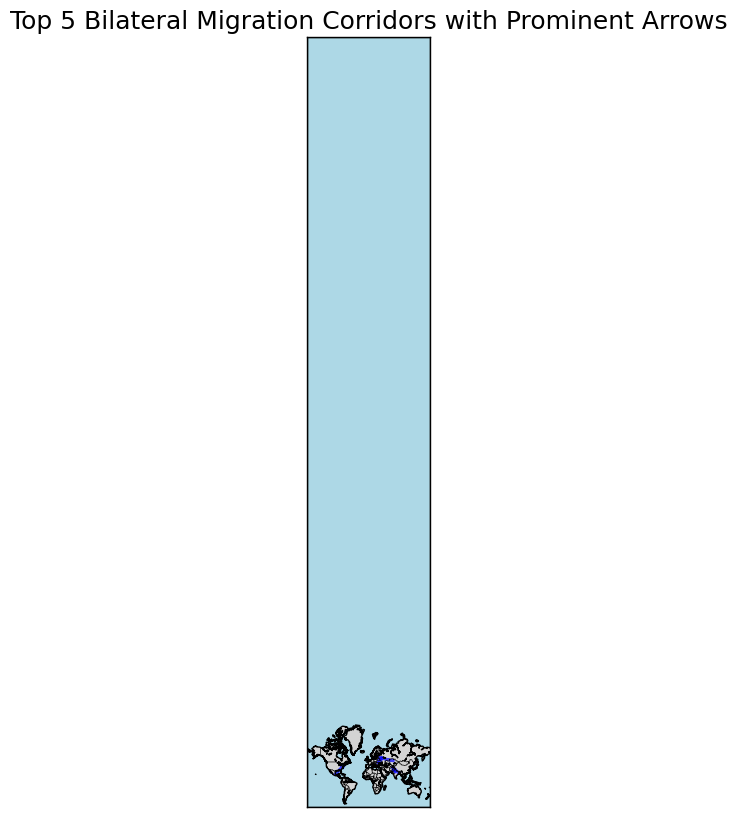

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Define the capital coordinates
capital_coords = {
    'India': [28.6139, 77.2090],
    'Pakistan': [33.6844, 73.0479],
    'Russian Federation': [55.7558, 37.6173],
    'Ukraine': [50.4501, 30.5234],
    'Mexico': [19.4326, -99.1332],
    'United States': [38.9072, -77.0369],
    'Kazakhstan': [51.1694, 71.4491],
    'Bangladesh': [23.8103, 90.4125]
}

# Top bilateral migration corridors
top_bilateral_pairs = [
    ('India', 'Pakistan'),
    ('Russian Federation', 'Ukraine'),
    ('Mexico', 'United States'),
    ('Kazakhstan', 'Russian Federation'),
    ('Bangladesh', 'India')
]

# Create a Basemap
fig, ax = plt.subplots(figsize=(15, 10))
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Add migration arrows
for origin, dest in top_bilateral_pairs:
    origin_coords = capital_coords[origin]
    dest_coords = capital_coords[dest]
    
    # Convert to map projection coordinates
    origin_x, origin_y = m(origin_coords[1], origin_coords[0])
    dest_x, dest_y = m(dest_coords[1], dest_coords[0])
    
    # Draw arrows with increased size and width for prominence
    plt.arrow(origin_x, origin_y, dest_x - origin_x, dest_y - origin_y,
              color='blue', alpha=0.7, head_width=500000, head_length=1000000, linewidth=2)

# Title
plt.title('Top 5 Bilateral Migration Corridors with Prominent Arrows', fontsize=18)
plt.show()


In [86]:
pip install geopandas folium

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/a2/02/ced7d7c24750f59ff78241d9adf424fbd295c130d9a287326fa1891738fa/pyogrio-0.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/2b/a6/302e0d9c210ccf4d1ffadf7ab941797d3255dcd5f93daa73aaf116a4db39/shapely-2.0.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/7

In [24]:
import folium

# Center of the map
m = folium.Map(location=[20, 0], zoom_start=2, tiles='OpenStreetMap')

# Add migration lines between origin and destination
for origin, dest in top_bilateral_pairs:
    origin_coords = capital_coords[origin]
    dest_coords = capital_coords[dest]
    
    # Add line (bidirectional arrow effect)
    folium.PolyLine(
        locations=[origin_coords, dest_coords],
        color='blue',
        weight=4,
        opacity=0.6
    ).add_to(m)

# Save to HTML file
m.save("top_migration_corridors.html")

# Display map inline in notebook
m


In [25]:
import folium

# Center of the map
m = folium.Map(location=[20, 0], zoom_start=2, tiles='OpenStreetMap')

# Add migration lines and red markers at endpoints
for origin, dest in top_bilateral_pairs:
    origin_coords = capital_coords[origin]
    dest_coords = capital_coords[dest]
    
    # Add line (bidirectional arrow effect)
    folium.PolyLine(
        locations=[origin_coords, dest_coords],
        color='blue',
        weight=4,
        opacity=0.6
    ).add_to(m)
    
    # Add red marker at the origin
    folium.Marker(
        location=origin_coords,
        icon=folium.Icon(color='red'),
        popup=f"{origin} (Origin)"
    ).add_to(m)
    
    # Add red marker at the destination
    folium.Marker(
        location=dest_coords,
        icon=folium.Icon(color='red'),
        popup=f"{dest} (Destination)"
    ).add_to(m)

# Save to HTML file
m.save("top_migration_corridors_with_red_markers.html")

# Display map inline in notebook
m


In [89]:
import folium

# Define the migration data (example migration counts for top bilateral pairs)
migration_counts = {
    ('India', 'Pakistan'): 87.52092,
    ('Russian Federation', 'Ukraine'): 79.997041,
    ('Mexico', 'United States'): 37.793378,
    ('Kazakhstan', 'Russian Federation'): 37.49294,
    ('Bangladesh', 'India'): 33.387464
}

# Create a Folium map centered on the world
m = folium.Map(location=[20, 0], zoom_start=2, tiles='OpenStreetMap')

# Add migration lines with tooltips and red markers at endpoints
for origin, dest in top_bilateral_pairs:
    origin_coords = capital_coords[origin]
    dest_coords = capital_coords[dest]
    
    # Get migration count for this pair
    migration_count = migration_counts[(origin, dest)]
    
    # Create a tooltip with the country names and migration count
    tooltip_text = f"{origin} to {dest}: {migration_count:.2f} million"
    
    # Add a line between the origin and destination with a tooltip
    folium.PolyLine(
        locations=[origin_coords, dest_coords],
        color='blue',
        weight=4,
        opacity=0.6,
        tooltip=tooltip_text
    ).add_to(m)
    
    # Add red markers at the origin and destination
    folium.Marker(
        location=origin_coords,
        icon=folium.Icon(color='red'),
        popup=f"{origin} (Origin)"
    ).add_to(m)
    
    folium.Marker(
        location=dest_coords,
        icon=folium.Icon(color='red'),
        popup=f"{dest} (Destination)"
    ).add_to(m)

# Save the map to an HTML file
m.save("top_migration_corridors_with_tooltips.html")

# Display the map in a notebook (optional)
m


## Refugees

In [30]:
df[df['Country Dest Name'] == 'Refugees']

,Country Origin Name,Country Origin Code,Migration by Gender Name,Migration by Gender Code,Country Dest Name,Country Dest Code,1960,1970,1980,1990,2000,Total Migration


In [32]:
df.columns

Index(['Country Origin Name', 'Country Origin Code',
       'Migration by Gender Name', 'Migration by Gender Code',
       'Country Dest Name', 'Country Dest Code', '1960', '1970', '1980',
       '1990', '2000', 'Total Migration'],
      dtype='object')

In [31]:
df[df['Country Origin Name'] == 'Refugees']

,Country Origin Name,Country Origin Code,Migration by Gender Name,Migration by Gender Code,Country Dest Name,Country Dest Code,1960,1970,1980,1990,2000,Total Migration
116424,Refugees,zzz,Total,TOT,Afghanistan,AFG,0,0,0,0,0,0
116425,Refugees,zzz,Total,TOT,Albania,ALB,0,0,0,0,0,0
116426,Refugees,zzz,Total,TOT,Algeria,DZA,0,0,0,0,0,0
116427,Refugees,zzz,Total,TOT,American Samoa,ASM,0,0,0,0,0,0
116428,Refugees,zzz,Total,TOT,Andorra,AND,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
117112,Refugees,zzz,Male,MAL,Wallis and Futuna,WLF,0,0,0,0,0,0
117113,Refugees,zzz,Male,MAL,West Bank and Gaza,PSE,0,0,0,0,0,0
117114,Refugees,zzz,Male,MAL,"Yemen, Rep.",YEM,0,0,0,0,0,0
117115,Refugees,zzz,Male,MAL,Zambia,ZMB,0,0,0,0,0,0


In [39]:
# Assuming df is the dataframe provided by the user

# Step 1: Filter the dataframe for 'Refugees' and store it in a new dataframe 'df_ref'
df_ref = df[df['Country Origin Name'] == 'Reunion']

# Step 2: Rewriting the code to use df_ref for the plot

import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

# Function to plot the top K destinations for the selected year
def plot_top_k_by_year(K=5, year='Total Migration'):
    # Filter Male and Female separately from df_ref
    df_male = df_ref[(df_ref['Migration by Gender Name'] == 'Male')]
    df_female = df_ref[(df_ref['Migration by Gender Name'] == 'Female')]
    
    # Group by destination and sum the selected year
    top_male = df_male.groupby('Country Dest Name')[year].sum().nlargest(K)
    top_female = df_female.groupby('Country Dest Name')[year].sum().nlargest(K)
    
    # Get the common top destinations for both male and female for alignment
    top_dest = set(top_male.index).union(set(top_female.index))
    
    # Align the data
    top_male = top_male.reindex(top_dest, fill_value=0)
    top_female = top_female.reindex(top_dest, fill_value=0)
    
    # Plot side by side
    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.4  # width of the bars
    
    # Plot Male migration
    ax.bar([x - width/2 for x in range(len(top_male))], top_male.values, width=width, label='Male')
    
    # Plot Female migration
    ax.bar([x + width/2 for x in range(len(top_female))], top_female.values, width=width, label='Female')
    
    # Setting labels and titles
    ax.set_xticks(range(len(top_dest)))
    ax.set_xticklabels(top_male.index, rotation=45, ha="right")
    ax.set_xlabel('Country Destination Name')
    ax.set_ylabel(f'Migration in {year}')
    ax.set_title(f'Top {K} Destinations for Male and Female Refugee Migration in {year}')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Interactive widget to select K and year
interact(plot_top_k_by_year, K=(1, 20, 1), year=['1960', '1970', '1980', '1990', '2000', 'Total Migration']);


interactive(children=(IntSlider(value=5, description='K', max=20, min=1), Dropdown(description='year', index=5…

In [38]:
df[df['Country Origin Name'] == 'Reunion'].sum()

Country Origin Name         ReunionReunionReunionReunionReunionReunionReun...
Country Origin Code         REUREUREUREUREUREUREUREUREUREUREUREUREUREUREUR...
Migration by Gender Name    TotalTotalTotalTotalTotalTotalTotalTotalTotalT...
Migration by Gender Code    TOTTOTTOTTOTTOTTOTTOTTOTTOTTOTTOTTOTTOTTOTTOTT...
Country Dest Name           AfghanistanAlbaniaAlgeriaAmerican SamoaAndorra...
Country Dest Code           AFGALBDZAASMANDAGOAIAATGARGARMABWAUSAUTAZEBHSB...
1960                                                                     3930
1970                                                                    14088
1980                                                                   151454
1990                                                                     5335
2000                                                                   230240
Total Migration                                                        405047
dtype: object

In [37]:
df['Country Origin Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Falkland Is

In [41]:
df.columns

Index(['Country Origin Name', 'Country Origin Code',
       'Migration by Gender Name', 'Migration by Gender Code',
       'Country Dest Name', 'Country Dest Code', '1960', '1970', '1980',
       '1990', '2000', 'Total Migration'],
      dtype='object')

In [42]:
# Step 1: Create unique pairs of source-destination by sorting them
df['pair'] = df.apply(lambda row: '-'.join(sorted([row['Country Origin Name'], row['Country Dest Name']])), axis=1)

# Step 2: Remove duplicated pairs (to avoid source-destination and destination-source repeats)
df_unique = df.drop_duplicates(subset=['pair'])

# Step 3: Iterate over each year, find top 5 pairs
top_pairs_by_year = {}
years = ['1960', '1970', '1980', '1990', '2000']

for year in years:
    # Sort by migration count for the given year and select top 5
    top_5 = df_unique[['Country Origin Name', 'Country Dest Name', year]].sort_values(by=year, ascending=False).head(5)
    top_pairs_by_year[year] = top_5

# Now `top_pairs_by_year` contains the top 5 pairs for each year


In [43]:
top_pairs_by_year

{'1960':        Country Origin Name     Country Dest Name     1960
 63220                India              Pakistan  6293916
 118718  Russian Federation               Ukraine  3233837
 28505                China             Indonesia  1723200
 28501                China  Hong Kong SAR, China  1562528
 68132                Italy         United States  1312537,
 '1970':        Country Origin Name   Country Dest Name     1970
 63220                India            Pakistan  4858023
 118718  Russian Federation             Ukraine  4182267
 1454               Algeria              France  1493990
 70856           Kazakhstan  Russian Federation  1371420
 68132                Italy       United States  1193985,
 '1980':        Country Origin Name     Country Dest Name     1980
 118718  Russian Federation               Ukraine  4803152
 11179           Bangladesh                 India  4653065
 63220                India              Pakistan  3899706
 91694               Mexico         United

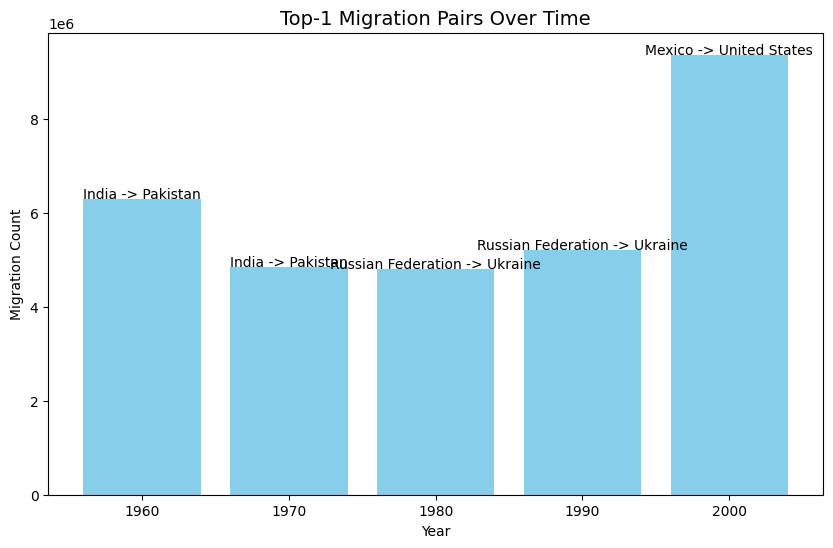

In [46]:
import matplotlib.pyplot as plt

# Step 1: Create a dictionary to hold top-1 pairs and their migration values for each year
top_1_by_year = {}

for year in years:
    # Sort by migration for the given year and get the top 1 pair
    top_1 = df_unique[['Country Origin Name', 'Country Dest Name', year]].sort_values(by=year, ascending=False).head(1)
    pair_name = top_1['Country Origin Name'].values[0] + " -> " + top_1['Country Dest Name'].values[0]
    top_1_by_year[year] = (pair_name, top_1[year].values[0])

# Step 2: Plotting the results
years = list(top_1_by_year.keys())
migration_counts = [top_1_by_year[year][1] for year in years]
pairs = [top_1_by_year[year][0] for year in years]

plt.figure(figsize=(10, 6))
plt.bar(years, migration_counts, color='skyblue')

# Adding pair labels to each bar
for i, year in enumerate(years):
    plt.text(year, migration_counts[i] + 10000, pairs[i], ha='center', fontsize=10)

plt.title('Top-1 Migration Pairs Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Migration Count')
plt.xticks(years)
plt.show()


In [45]:
import matplotlib.pyplot as plt

# Extract top-1 pairs for each year
top_1_by_year = {}

for year in years:
    top_1 = df_unique[['Country Origin Name', 'Country Dest Name', year]].sort_values(by=year, ascending=False).head(1)
    top_1_by_year[year] = top_1.iloc[0]  # Flattening the result

# Convert to a DataFrame for easier plotting
top_1_df = pd.DataFrame.from_dict(top_1_by_year, orient='index').reset_index()
top_1_df.columns = ['Year', 'Country Origin Name', 'Country Dest Name', 'Migration']

# Combine the origin and destination countries into a label for the bar plot
top_1_df['Pair'] = top_1_df['Country Origin Name'] + " -> " + top_1_df['Country Dest Name']

# Plotting the bar plot
plt.figure(figsize=(10,6))
plt.bar(top_1_df['Year'], top_1_df['Migration'], color='skyblue')

# Adding labels
for i, row in top_1_df.iterrows():
    plt.text(row['Year'], row['Migration'] + 10000, row['Pair'], ha='center', fontsize=10)

plt.title('Top-1 Migration Pairs Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Migration Count')
plt.xticks(top_1_df['Year'])
plt.show()


ValueError: Length mismatch: Expected axis has 8 elements, new values have 4 elements

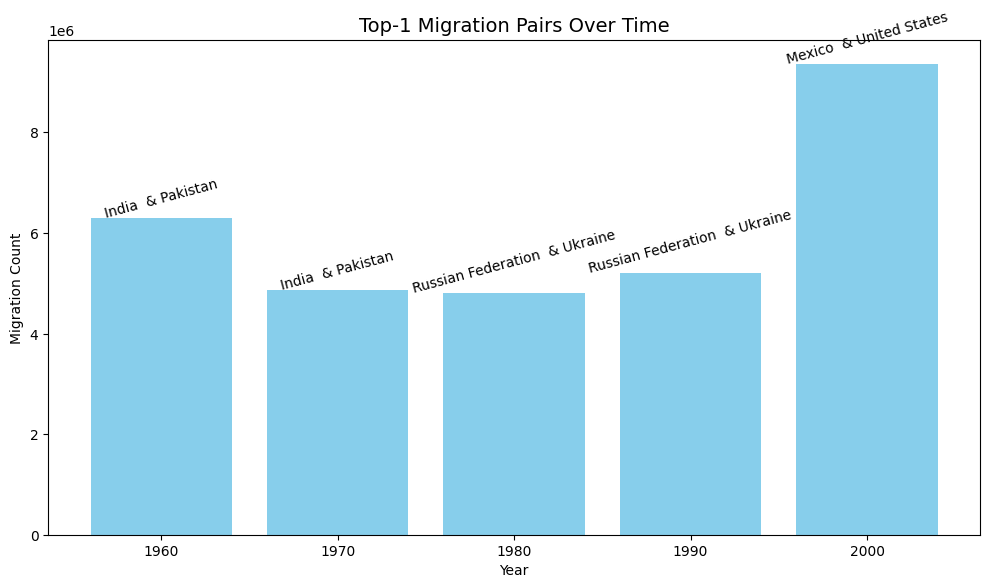

In [48]:
import matplotlib.pyplot as plt

# Step 1: Create a dictionary to hold top-1 pairs and their migration values for each year
top_1_by_year = {}

for year in years:
    # Sort by migration for the given year and get the top 1 pair
    top_1 = df_unique[['Country Origin Name', 'Country Dest Name', year]].sort_values(by=year, ascending=False).head(1)
    pair_name = top_1['Country Origin Name'].values[0] + "  & " + top_1['Country Dest Name'].values[0]
    top_1_by_year[year] = (pair_name, top_1[year].values[0])

# Step 2: Plotting the results
years = list(top_1_by_year.keys())
migration_counts = [top_1_by_year[year][1] for year in years]
pairs = [top_1_by_year[year][0] for year in years]

plt.figure(figsize=(10, 6))
bars = plt.bar(years, migration_counts, color='skyblue')

# Adding pair labels to each bar with rotation to avoid overlap
for i, year in enumerate(years):
    plt.text(year, migration_counts[i] + 10000, pairs[i], ha='center', fontsize=10, rotation=15)

plt.title('Top-1 Migration Pairs Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Migration Count')
plt.xticks(years)
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()


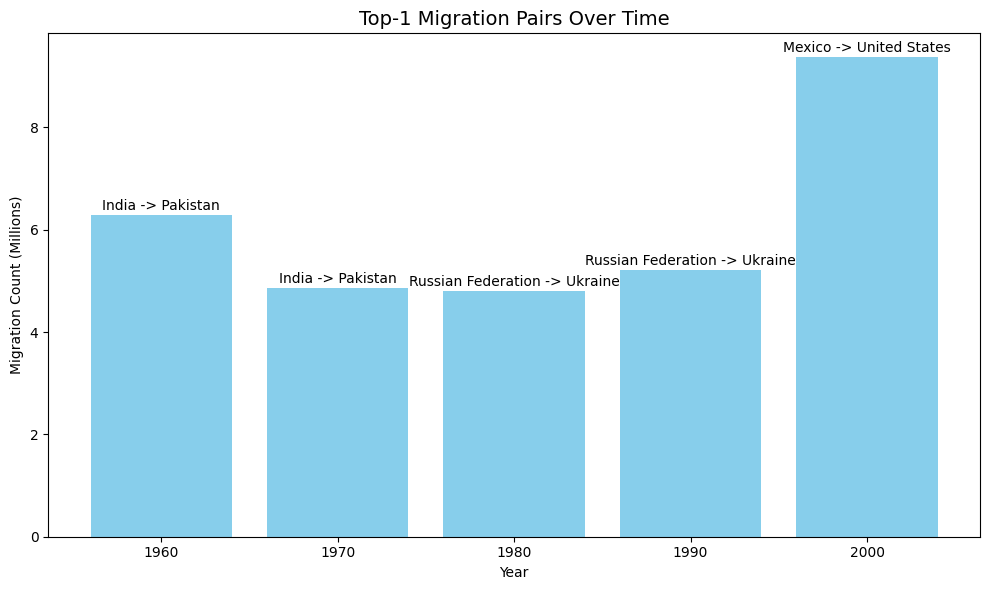

In [49]:
import matplotlib.pyplot as plt

# Step 1: Create a dictionary to hold top-1 pairs and their migration values for each year
top_1_by_year = {}

for year in years:
    # Sort by migration for the given year and get the top 1 pair
    top_1 = df_unique[['Country Origin Name', 'Country Dest Name', year]].sort_values(by=year, ascending=False).head(1)
    pair_name = top_1['Country Origin Name'].values[0] + " -> " + top_1['Country Dest Name'].values[0]
    top_1_by_year[year] = (pair_name, top_1[year].values[0])

# Step 2: Plotting the results
years = list(top_1_by_year.keys())
migration_counts = [top_1_by_year[year][1] / 1_000_000 for year in years]  # Convert to millions
pairs = [top_1_by_year[year][0] for year in years]

plt.figure(figsize=(10, 6))
bars = plt.bar(years, migration_counts, color='skyblue')

# Adding pair labels to each bar without rotation
for i, year in enumerate(years):
    plt.text(year, migration_counts[i] + 0.1, pairs[i], ha='center', fontsize=10)

plt.title('Top-1 Migration Pairs Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Migration Count (Millions)')
plt.xticks(years)
plt.tight_layout()  # Adjust layout
plt.show()


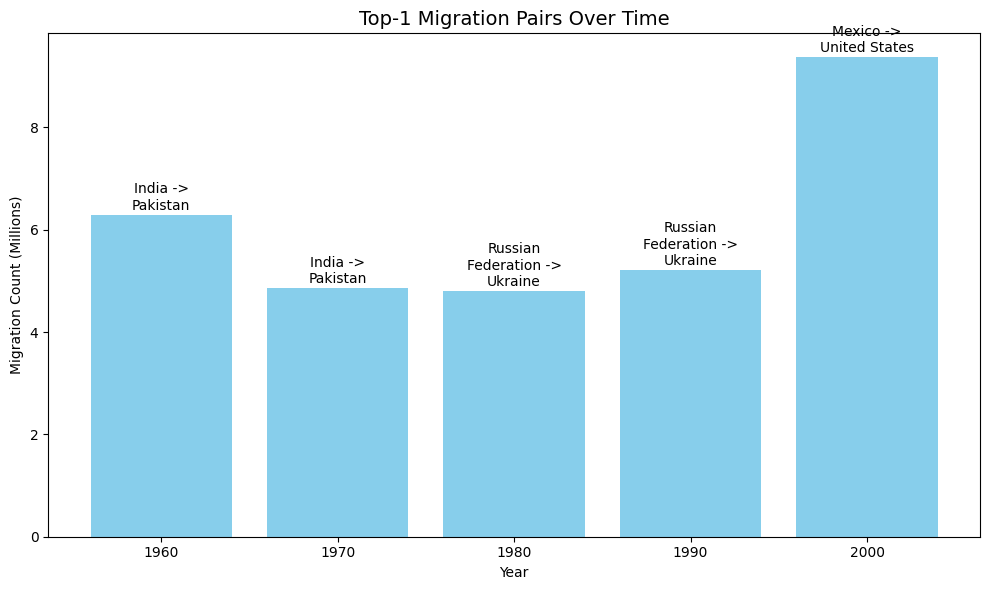

In [50]:
import matplotlib.pyplot as plt
import textwrap

# Step 1: Create a dictionary to hold top-1 pairs and their migration values for each year
top_1_by_year = {}

for year in years:
    # Sort by migration for the given year and get the top 1 pair
    top_1 = df_unique[['Country Origin Name', 'Country Dest Name', year]].sort_values(by=year, ascending=False).head(1)
    pair_name = top_1['Country Origin Name'].values[0] + " -> " + top_1['Country Dest Name'].values[0]
    top_1_by_year[year] = (pair_name, top_1[year].values[0])

# Step 2: Plotting the results
years = list(top_1_by_year.keys())
migration_counts = [top_1_by_year[year][1] / 1_000_000 for year in years]  # Convert to millions
pairs = [top_1_by_year[year][0] for year in years]

# Helper function to wrap text
def wrap_text(text, width=10):
    return '\n'.join(textwrap.wrap(text, width=width))

# Apply wrapping to each pair name
wrapped_pairs = [wrap_text(pair, width=15) for pair in pairs]

plt.figure(figsize=(10, 6))
bars = plt.bar(years, migration_counts, color='skyblue')

# Adding wrapped pair labels above each bar
for i, year in enumerate(years):
    plt.text(year, migration_counts[i] + 0.1, wrapped_pairs[i], ha='center', fontsize=10)

plt.title('Top-1 Migration Pairs Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Migration Count (Millions)')
plt.xticks(years)
plt.tight_layout()  # Adjust layout
plt.show()


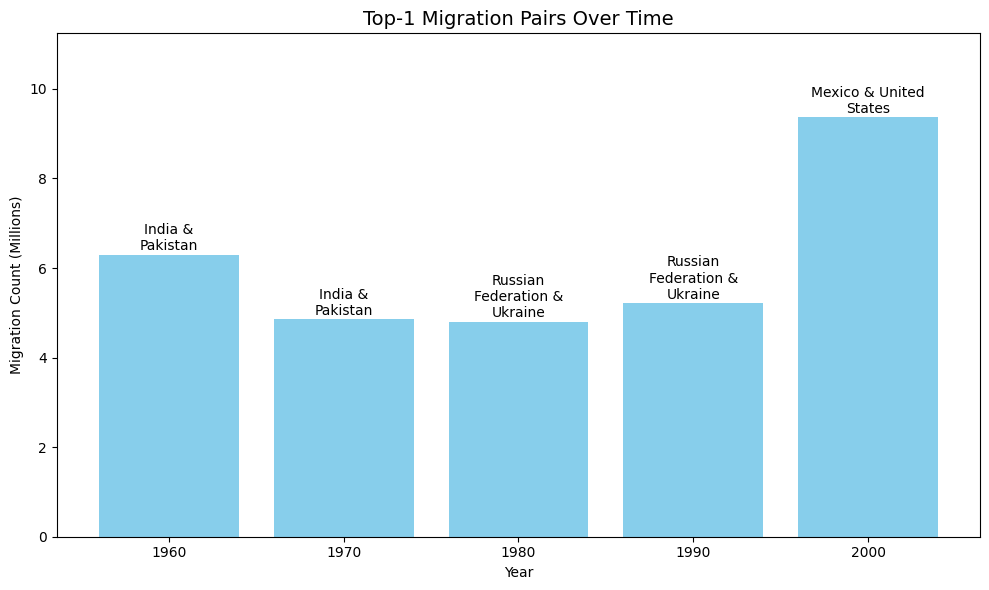

In [52]:
import matplotlib.pyplot as plt
import textwrap

# Step 1: Create a dictionary to hold top-1 pairs and their migration values for each year
top_1_by_year = {}

for year in years:
    # Sort by migration for the given year and get the top 1 pair
    top_1 = df_unique[['Country Origin Name', 'Country Dest Name', year]].sort_values(by=year, ascending=False).head(1)
    pair_name = top_1['Country Origin Name'].values[0] + " & " + top_1['Country Dest Name'].values[0]
    top_1_by_year[year] = (pair_name, top_1[year].values[0])

# Step 2: Plotting the results
years = list(top_1_by_year.keys())
migration_counts = [top_1_by_year[year][1] / 1_000_000 for year in years]  # Convert to millions
pairs = [top_1_by_year[year][0] for year in years]

# Helper function to wrap text
def wrap_text(text, width=10):
    return '\n'.join(textwrap.wrap(text, width=width))

# Apply wrapping to each pair name
wrapped_pairs = [wrap_text(pair, width=15) for pair in pairs]

plt.figure(figsize=(10, 6))
bars = plt.bar(years, migration_counts, color='skyblue')

# Adding wrapped pair labels above each bar
for i, year in enumerate(years):
    plt.text(year, migration_counts[i] + 0.1, wrapped_pairs[i], ha='center', fontsize=10)

# Adjusting the y-axis limit to accommodate text
max_migration = max(migration_counts)
plt.ylim(0, max_migration * 1.2)  # Increase y-axis by 20% to fit the text

plt.title('Top-1 Migration Pairs Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Migration Count (Millions)')
plt.xticks(years)
plt.tight_layout()  # Adjust layout
plt.show()


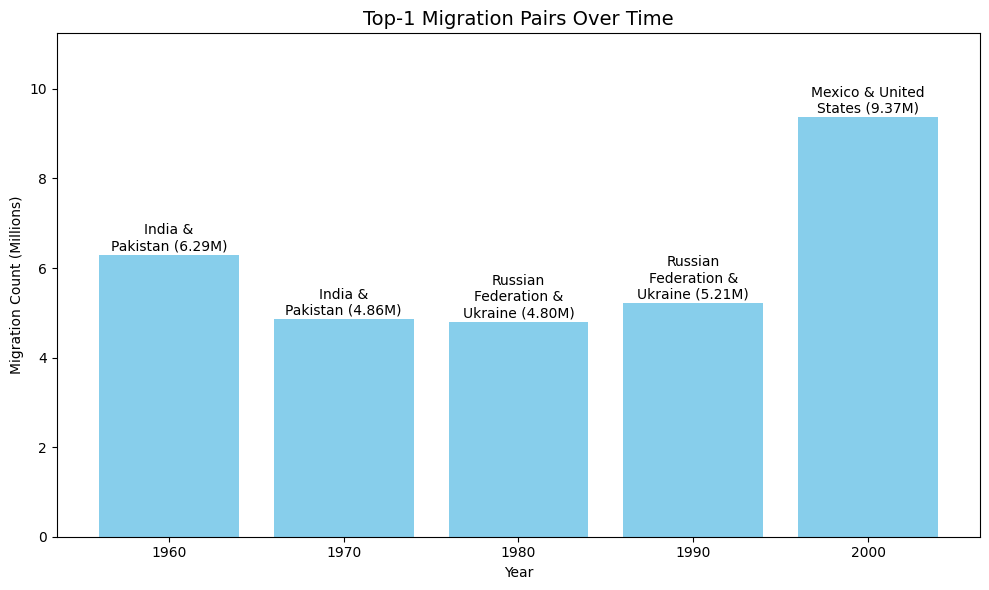

In [54]:
import matplotlib.pyplot as plt
import textwrap

# Step 1: Create a dictionary to hold top-1 pairs and their migration values for each year
top_1_by_year = {}

for year in years:
    # Sort by migration for the given year and get the top 1 pair
    top_1 = df_unique[['Country Origin Name', 'Country Dest Name', year]].sort_values(by=year, ascending=False).head(1)
    pair_name = top_1['Country Origin Name'].values[0] + " & " + top_1['Country Dest Name'].values[0]
    top_1_by_year[year] = (pair_name, top_1[year].values[0])

# Step 2: Plotting the results
years = list(top_1_by_year.keys())
migration_counts = [top_1_by_year[year][1] / 1_000_000 for year in years]  # Convert to millions
pairs = [top_1_by_year[year][0] for year in years]

# Helper function to wrap text
def wrap_text(text, width=10):
    return '\n'.join(textwrap.wrap(text, width=width))

# Combine pair names with their respective migration counts in brackets
wrapped_pairs_with_counts = [
    f"{wrap_text(pair, width=15)} ({migration_counts[i]:.2f}M)"
    for i, pair in enumerate(pairs)
]

plt.figure(figsize=(10, 6))
bars = plt.bar(years, migration_counts, color='skyblue')

# Adding wrapped pair labels with counts above each bar
for i, year in enumerate(years):
    plt.text(year, migration_counts[i] + 0.1, wrapped_pairs_with_counts[i], ha='center', fontsize=10)

# Adjusting the y-axis limit to accommodate text
max_migration = max(migration_counts)
plt.ylim(0, max_migration * 1.2)  # Increase y-axis by 20% to fit the text

plt.title('Top-1 Migration Pairs Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Migration Count (Millions)')
plt.xticks(years)
plt.tight_layout()  # Adjust layout
plt.show()


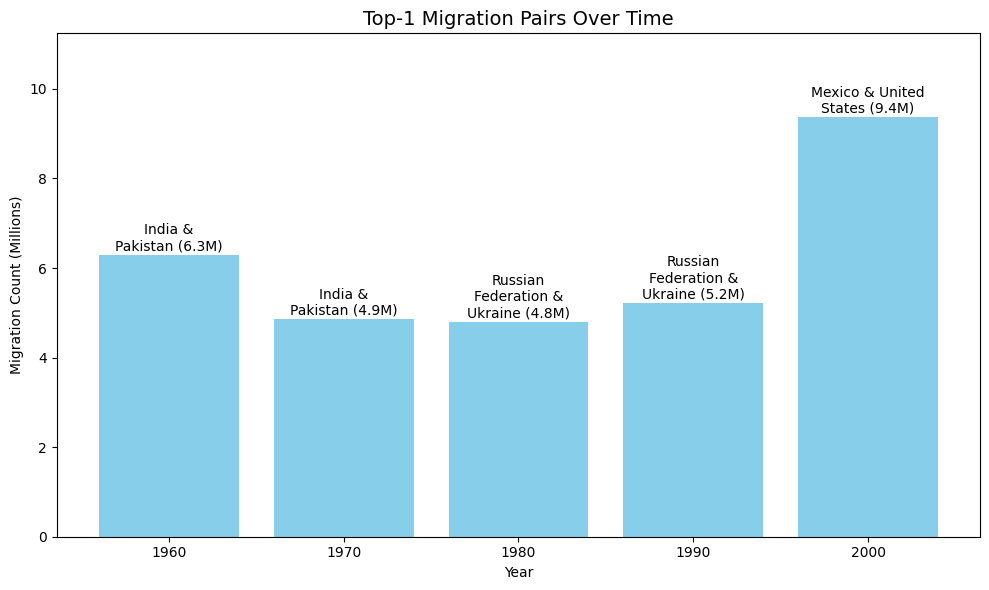

In [57]:
import matplotlib.pyplot as plt
import textwrap

# Step 1: Create a dictionary to hold top-1 pairs and their migration values for each year
top_1_by_year = {}

for year in years:
    # Sort by migration for the given year and get the top 1 pair
    top_1 = df_unique[['Country Origin Name', 'Country Dest Name', year]].sort_values(by=year, ascending=False).head(1)
    pair_name = top_1['Country Origin Name'].values[0] + " & " + top_1['Country Dest Name'].values[0]
    top_1_by_year[year] = (pair_name, top_1[year].values[0])

# Step 2: Plotting the results
years = list(top_1_by_year.keys())
migration_counts = [top_1_by_year[year][1] / 1_000_000 for year in years]  # Convert to millions
pairs = [top_1_by_year[year][0] for year in years]

# Helper function to wrap text
def wrap_text(text, width=10):
    return '\n'.join(textwrap.wrap(text, width=width))

# Combine pair names with their respective migration counts in brackets (rounded to 1 decimal)
wrapped_pairs_with_counts = [
    f"{wrap_text(pair, width=15)} ({migration_counts[i]:.1f}M)"
    for i, pair in enumerate(pairs)
]

plt.figure(figsize=(10, 6))
bars = plt.bar(years, migration_counts, color='skyblue')

# Adding wrapped pair labels with counts above each bar
for i, year in enumerate(years):
    plt.text(year, migration_counts[i] + 0.1, wrapped_pairs_with_counts[i], ha='center', fontsize=10)

# Adjusting the y-axis limit to accommodate text
max_migration = max(migration_counts)
plt.ylim(0, max_migration * 1.2)  # Increase y-axis by 20% to fit the text

plt.title('Top-1 Migration Pairs Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Migration Count (Millions)')
plt.xticks(years)
plt.tight_layout()  # Adjust layout
plt.savefig('top_migration_pairs.jpeg', format='jpeg', dpi=300)
plt.show()


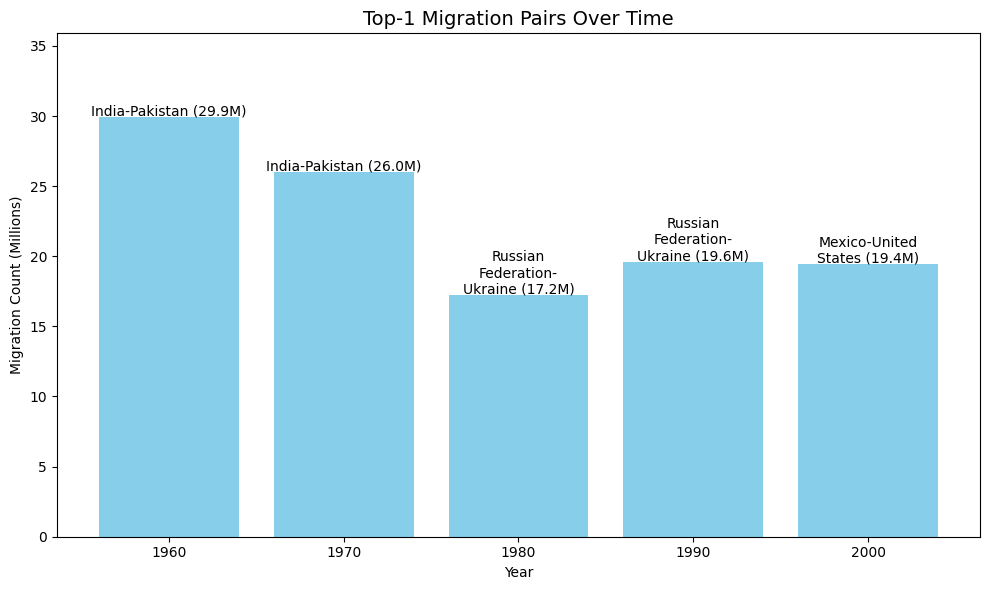

In [58]:
import matplotlib.pyplot as plt
import textwrap

# Step 1: Create unique, undirected pairs by sorting origin and destination countries
df['pair'] = df.apply(lambda row: '-'.join(sorted([row['Country Origin Name'], row['Country Dest Name']])), axis=1)

# Step 2: Group by the pair and sum the migration for each time point
df_grouped = df.groupby('pair')[years].sum().reset_index()

# Step 3: Get top-1 pairs for each year
top_1_by_year = {}

for year in years:
    # Sort by migration for the given year and get the top 1 pair
    top_1 = df_grouped[['pair', year]].sort_values(by=year, ascending=False).head(1)
    pair_name = top_1['pair'].values[0]
    top_1_by_year[year] = (pair_name, top_1[year].values[0])

# Step 4: Plotting the results
years = list(top_1_by_year.keys())
migration_counts = [top_1_by_year[year][1] / 1_000_000 for year in years]  # Convert to millions
pairs = [top_1_by_year[year][0] for year in years]

# Helper function to wrap text
def wrap_text(text, width=10):
    return '\n'.join(textwrap.wrap(text, width=width))

# Combine pair names with their respective migration counts in brackets (rounded to 1 decimal)
wrapped_pairs_with_counts = [
    f"{wrap_text(pair, width=15)} ({migration_counts[i]:.1f}M)"
    for i, pair in enumerate(pairs)
]

plt.figure(figsize=(10, 6))
bars = plt.bar(years, migration_counts, color='skyblue')

# Adding wrapped pair labels with counts above each bar
for i, year in enumerate(years):
    plt.text(year, migration_counts[i] + 0.1, wrapped_pairs_with_counts[i], ha='center', fontsize=10)

# Adjusting the y-axis limit to accommodate text
max_migration = max(migration_counts)
plt.ylim(0, max_migration * 1.2)  # Increase y-axis by 20% to fit the text

plt.title('Top-1 Migration Pairs Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Migration Count (Millions)')
plt.xticks(years)
plt.tight_layout()

# Save the plot as a high-definition JPEG
plt.savefig('top_migration_pairs_combined.jpeg', format='jpeg', dpi=300)

plt.show()


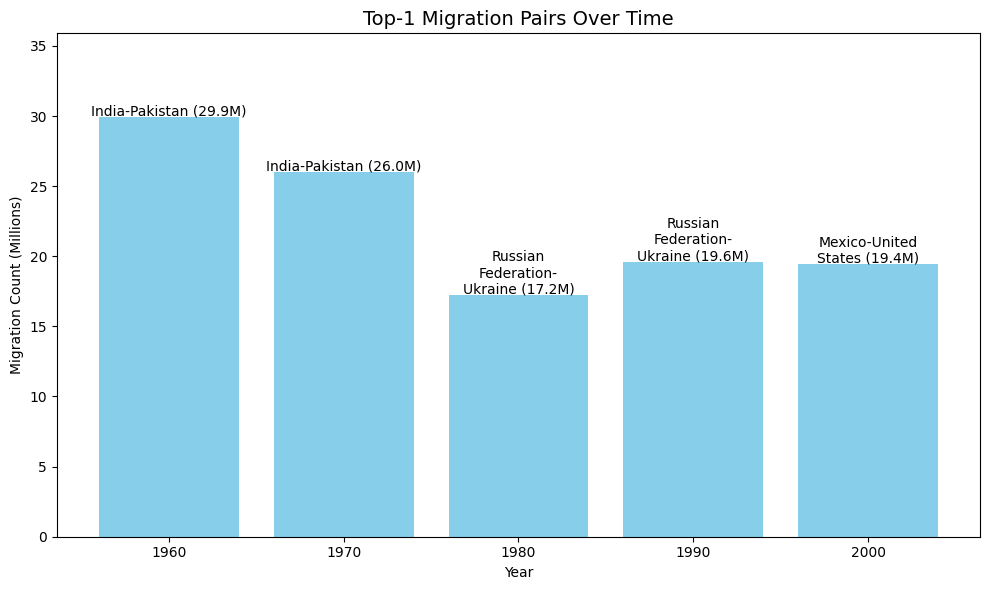

In [59]:
# Step 1: Create unique, undirected pairs by sorting origin and destination countries
df['pair'] = df.apply(lambda row: '-'.join(sorted([row['Country Origin Name'], row['Country Dest Name']])), axis=1)

# Step 2: Group by the pair and sum the migration for each time point (only for the individual years, not total migration)
df_grouped = df.groupby('pair')[['1960', '1970', '1980', '1990', '2000']].sum().reset_index()

# Step 3: Get top-1 pairs for each year
top_1_by_year = {}

for year in ['1960', '1970', '1980', '1990', '2000']:
    # Sort by migration for the given year and get the top 1 pair
    top_1 = df_grouped[['pair', year]].sort_values(by=year, ascending=False).head(1)
    pair_name = top_1['pair'].values[0]
    top_1_by_year[year] = (pair_name, top_1[year].values[0])

# Step 4: Plotting the results
years = list(top_1_by_year.keys())
migration_counts = [top_1_by_year[year][1] / 1_000_000 for year in years]  # Convert to millions
pairs = [top_1_by_year[year][0] for year in years]

# Helper function to wrap text
def wrap_text(text, width=10):
    return '\n'.join(textwrap.wrap(text, width=width))

# Combine pair names with their respective migration counts in brackets (rounded to 1 decimal)
wrapped_pairs_with_counts = [
    f"{wrap_text(pair, width=15)} ({migration_counts[i]:.1f}M)"
    for i, pair in enumerate(pairs)
]

plt.figure(figsize=(10, 6))
bars = plt.bar(years, migration_counts, color='skyblue')

# Adding wrapped pair labels with counts above each bar
for i, year in enumerate(years):
    plt.text(year, migration_counts[i] + 0.1, wrapped_pairs_with_counts[i], ha='center', fontsize=10)

# Adjusting the y-axis limit to accommodate text
max_migration = max(migration_counts)
plt.ylim(0, max_migration * 1.2)  # Increase y-axis by 20% to fit the text

plt.title('Top-1 Migration Pairs Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Migration Count (Millions)')
plt.xticks(years)
plt.tight_layout()

# Save the plot as a high-definition JPEG
plt.savefig('top_migration_pairs_combined_yearly.jpeg', format='jpeg', dpi=300)

plt.show()

